Hasil integrasi dengan metode Romberg: 1.1939459267321881

Iterasi | Jumlah Interval |  Hasil Trapezoidal
------------------------------------------------
      1 |               2 |       0.9612095833
      2 |               4 |       1.1374479009
      3 |               8 |       1.1799214700
      4 |              16 |       1.1904459870
      5 |              32 |       1.1930713265
      6 |              64 |       1.1937273007

Tabel Iterasi Metode Romberg:
Iterasi | Kolom 0
---------------------
      1 |   0.127003
      2 |   0.961210 |   1.239279
      3 |   1.137448 |   1.196194 |   1.193322
      4 |   1.179921 |   1.194079 |   1.193938 |   1.193948
      5 |   1.190446 |   1.193954 |   1.193946 |   1.193946 |   1.193946
      6 |   1.193071 |   1.193946 |   1.193946 |   1.193946 |   1.193946 |   1.193946


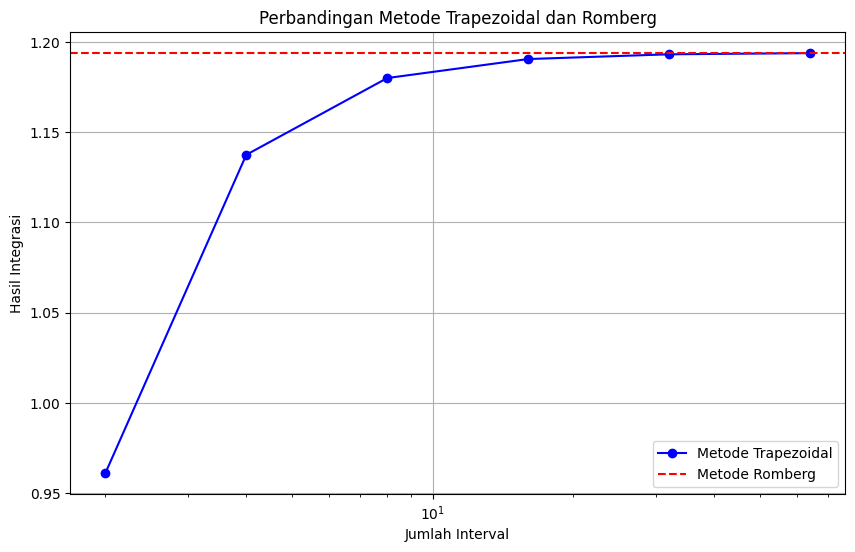

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi yang akan kita integrasikan
def f(x):
    return np.sin(x)  # Contoh fungsi, dapat diganti dengan fungsi lain

# Metode Trapezoidal
def trapezoidal(f, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        integral += f(a + i * h)
    integral *= h
    return integral

# Metode Romberg
def romberg(f, a, b, tol=1e-6):
    R = [[trapezoidal(f, a, b, 1)]]  # Matriks untuk menyimpan hasil Romberg
    n = 1  # Jumlah interval awal
    k = 0  # Indeks Romberg

    while True:
        n *= 2
        R.append([0.0] * (k + 2))
        R[k+1][0] = trapezoidal(f, a, b, n)

        # Ekstrapolasi Richardson
        for j in range(1, k + 2):
            R[k+1][j] = R[k+1][j-1] + (R[k+1][j-1] - R[k][j-1]) / (4**j - 1)

        if abs(R[k+1][k+1] - R[k][k]) < tol:
            return R[k+1][k+1], R

        k += 1

# Parameter awal (bisa diubah sesuai kebutuhan)
a = 1 # Batas bawah
b = 4 # Batas atas
tol = 1e-6 # Toleransi kesalahan

# Menghitung integral dengan metode Romberg
hasil_romberg, R = romberg(f, a, b, tol)
print(f"Hasil integrasi dengan metode Romberg: {hasil_romberg}\n")

# Menghitung integral dengan metode Trapezoidal untuk beberapa jumlah interval
n_intervals = [2**i for i in range(1, len(R)+1)]
trapezoidal_results = [trapezoidal(f, a, b, n) for n in n_intervals]

# Membuat tabel iterasi untuk metode Trapezoidal
print("Iterasi | Jumlah Interval |  Hasil Trapezoidal")
print("------------------------------------------------")
for i, (n, result) in enumerate(zip(n_intervals, trapezoidal_results), start=1):
    print(f"{i:>7} | {n:>15} | {result:>18.10f}")

# Membuat tabel iterasi untuk metode Romberg
print("\nTabel Iterasi Metode Romberg:")
print("Iterasi | " + " | ".join([f"Kolom {i}" for i in range(len(R[0]))]))
print("-" * (9 + len(R[0]) * 12))
for i, row in enumerate(R, start=1):
    print(f"{i:>7} | " + " | ".join([f"{value:>10.6f}" for value in row]))

# Visualisasi hasil integrasi dengan metode Trapezoidal dan Romberg
plt.figure(figsize=(10, 6))
plt.plot(n_intervals, trapezoidal_results, 'bo-', label='Metode Trapezoidal')
plt.axhline(hasil_romberg, color='r', linestyle='--', label='Metode Romberg')
plt.xscale('log')
plt.xlabel('Jumlah Interval')
plt.ylabel('Hasil Integrasi')
plt.title('Perbandingan Metode Trapezoidal dan Romberg')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()
